# 1.Load the dataset into python environment

In [1]:
#Initial imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#Loading dataset to python

df = pd.read_csv("D:\\Data Science and Analytics\\CaseStudy 6\\titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [2]:
df.set_index("PassengerId",inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [3]:
df.shape

(891, 11)

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

In [7]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

## Filling missing "AGE"

<function matplotlib.pyplot.show(close=None, block=None)>

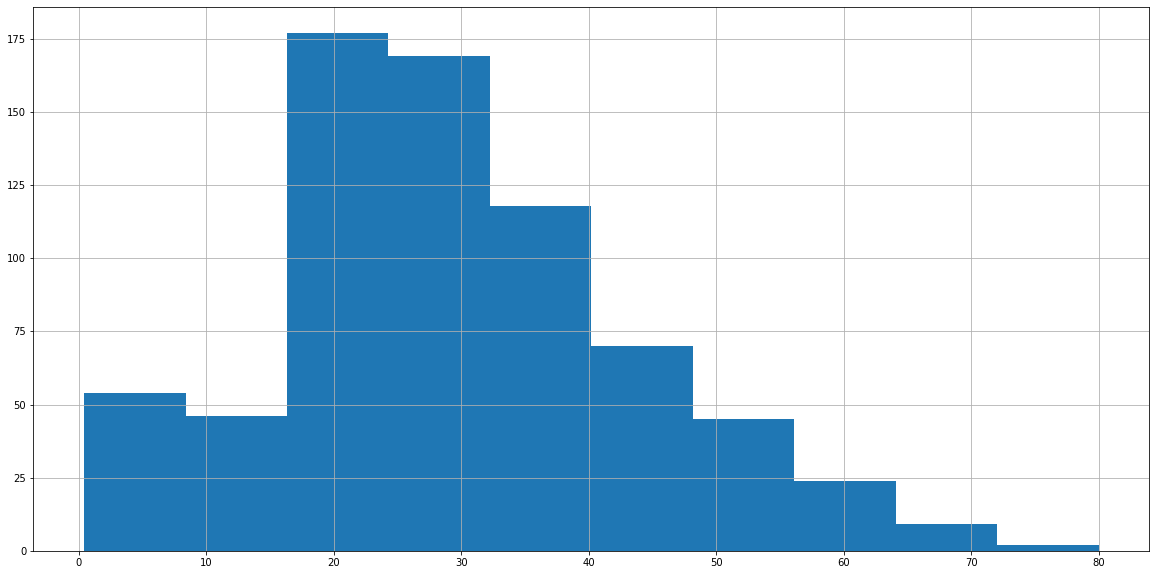

In [9]:

skewgraph = df["Age"]
skewgraph.hist(figsize=(20,10))
plt.show

### Since "Age" is right skewed, we use Median to fill missing "Age" values

In [10]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [11]:
df.isna().sum()
#We can see all age values are filled

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Filling missing "Cabin"

In [12]:
#Cabin have 891 rows out of which 687 are NaN, ie over 77 percent of observation dont have "cabin" data.

In [13]:
#Since cabin is a categorical data, we cant use mathematical terms of central tendancy.
#so we replace Nan with term "Unkown"
df["Cabin"].fillna("Unknown",inplace=True)


In [14]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S


## Filling missing "Embarked"

### • In total 891 rows, we only have "Embarked" missing on two observations. 

### • It better to fill missing values with mode of the column

In [15]:
#Value counts
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
#Mode of the column
df["Embarked"].mode()

0    S
dtype: object

In [17]:
#Replacing na with mode
df["Embarked"].fillna(df["Embarked"].mode().iat[0],inplace=True)

In [18]:
#There is no more na values in "Embarked"
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x16f16caab50>,
 'caps': [<matplotlib.lines.Line2D at 0x16f16cb7250>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f16caa850>],
 'medians': [<matplotlib.lines.Line2D at 0x16f16cb7910>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f16cb7c70>],
 'means': []}

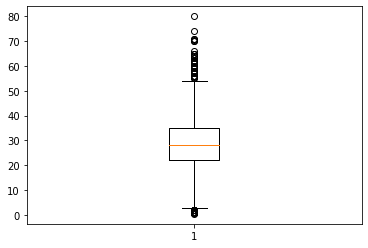

In [19]:
#Handling Age outliers

plt.boxplot(df["Age"])


In [20]:
import scipy.stats as stats
Q1 = df["Age"].quantile(q=.25)
Q3 = df["Age"].quantile(q=.75)
IQR = df["Age"].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df["Age"] < (Q1-1.5*IQR)) | (df["Age"] > (Q3+1.5*IQR)))]

data_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,Unknown,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S


{'whiskers': [<matplotlib.lines.Line2D at 0x16f16d5ff40>,
 'caps': [<matplotlib.lines.Line2D at 0x16f16d6b640>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f16d5fbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f16d6bd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f16d760a0>],
 'means': []}

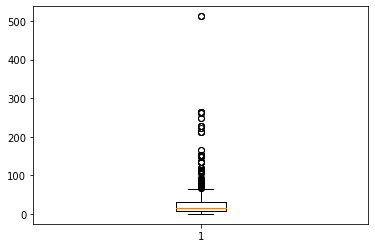

In [21]:
#Handling "Fare" outlier
plt.boxplot(df["Fare"])

In [22]:
Q1 = df["Fare"].quantile(q=.25)
Q3 = df["Fare"].quantile(q=.75)
IQR = df["Fare"].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df["Fare"] < (Q1-1.5*IQR)) | (df["Fare"] > (Q3+1.5*IQR)))]

data_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Unknown,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


{'whiskers': [<matplotlib.lines.Line2D at 0x16f16dc4280>,
 'caps': [<matplotlib.lines.Line2D at 0x16f16dc4940>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f16db6f40>],
 'medians': [<matplotlib.lines.Line2D at 0x16f16dcf040>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f16dcf3a0>],
 'means': []}

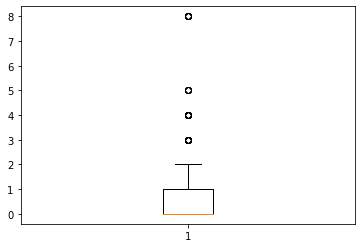

In [23]:
#Handling "SibSp" outlier
plt.boxplot(df["SibSp"])

In [24]:
Q1 = df["SibSp"].quantile(q=.25)
Q3 = df["SibSp"].quantile(q=.75)
IQR = df["SibSp"].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df["SibSp"] < (Q1-1.5*IQR)) | (df["SibSp"] > (Q3+1.5*IQR)))]
data_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S


# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [25]:
from sklearn import preprocessing
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [26]:
#Setting up range
min_max = preprocessing.MinMaxScaler(feature_range=(df["Survived"].min(),df["Survived"].max()))

In [27]:
#Dropping categorical data
dfCat= df.drop(['Name','Sex','Ticket','Embarked','Cabin'], axis = 1)
dfScaled = min_max.fit_transform(dfCat)

In [28]:
#Min_Max Scaled
dfScaled = pd.DataFrame(dfScaled)
dfScaled.describe()

,0,1,2,3,4,5
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.363679,0.065376,0.063599,0.062858
std,0.486592,0.418036,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.271174,0.000000,0.000000,0.015440
50%,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#The dataframe was transformed to min_max with a range of 0 to 1